In [1]:
import os
import numpy
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v

In [87]:
OUTPUT_FOLDER = '/disk2/workspace/20231118'

## CRK

In [162]:
site_output_csv = os.path.join(OUTPUT_FOLDER, 'CRK' + '_PL-JPL_outputs.csv')
datMMS = pd.read_csv(site_output_csv)

In [7]:
datMMS

,Time,NETRAD,TA,RH,NDVI_day_mean,TA_C,VPD,RH_roll,fAPAR,fIPAR,soil_moisture_constraint,savi,evapotranspiration,potential_evapotranspiration,canopy_transpiration,interception_evaporation,soil_evaporation
0,2018-01-01T00:00:00Z,-60.647635,261.73290,69.450005,0.237478,-11.41710,0.305500,0.694500,0.277621,0.187478,0.0,0.238865,NaN,-13.131535,0.0,-0.0,-0.0
1,2018-01-01T00:10:00Z,-59.540284,261.73290,69.450005,0.237478,-11.41710,0.305500,0.694500,0.277621,0.187478,0.0,0.238865,NaN,-12.891769,0.0,-0.0,-0.0
2,2018-01-01T00:20:00Z,-62.391110,261.06366,74.179220,0.237478,-12.08634,0.258208,0.741792,0.277621,0.187478,0.0,0.238865,NaN,-13.021318,0.0,-0.0,-0.0
3,2018-01-01T00:30:00Z,-62.120802,261.06366,74.179220,0.237478,-12.08634,0.258208,0.741792,0.277621,0.187478,0.0,0.238865,NaN,-12.964903,0.0,-0.0,-0.0
4,2018-01-01T00:40:00Z,-62.952325,261.06366,74.179220,0.237478,-12.08634,0.258208,0.741792,0.277621,0.187478,0.0,0.238865,NaN,-13.138446,0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105115,2019-12-31T23:10:00Z,NaN,260.05038,62.558212,0.226845,-13.09962,0.374418,0.625582,0.271098,0.176845,0.0,0.234080,NaN,NaN,0.0,NaN,NaN
105116,2019-12-31T23:20:00Z,NaN,260.52887,62.585197,0.226845,-12.62113,0.374148,0.625852,0.271098,0.176845,0.0,0.234080,NaN,NaN,0.0,NaN,NaN
105117,2019-12-31T23:30:00Z,NaN,260.52887,62.585197,0.226845,-12.62113,0.374148,0.625852,0.271098,0.176845,0.0,0.234080,NaN,NaN,0.0,NaN,NaN
105118,2019-12-31T23:40:00Z,NaN,260.52887,62.585197,0.226845,-12.62113,0.374148,0.625852,0.271098,0.176845,0.0,0.234080,NaN,NaN,0.0,NaN,NaN


In [163]:
site_timelist = numpy.array(datMMS.Time)
site_et_list = numpy.array(datMMS.evapotranspiration).astype(float)

In [164]:
site_obs_le_csv = os.path.join('/disk2/Data/FluxSite4ET/validation', 'CRK' + '_2018_2019_LE.csv')
site_obs_timelist, site_obs_le = read_site_csv(site_obs_le_csv)

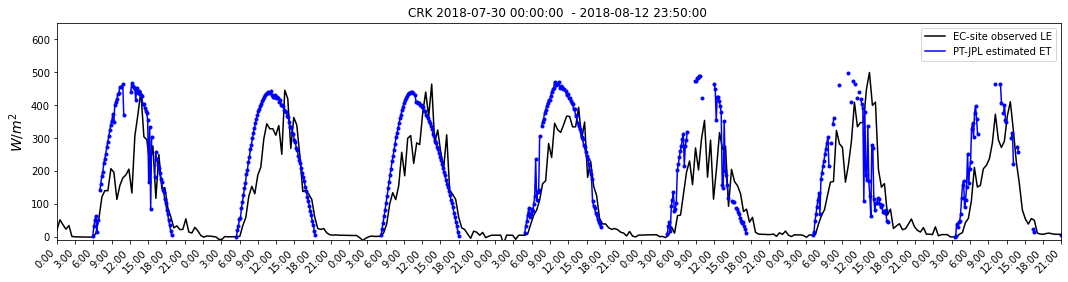

In [165]:
# good 30
week_idx = 30
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title(('CRK ' + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

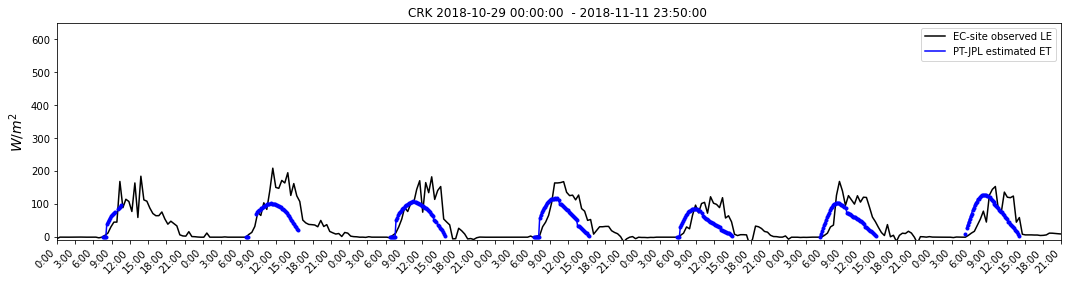

In [166]:
# good 30
week_idx = 43
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title(('CRK ' + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

## GCK

In [167]:
site_output_csv = os.path.join(OUTPUT_FOLDER, 'GCK' + '_PL-JPL_outputs.csv')
datMMS = pd.read_csv(site_output_csv)

In [168]:
site_timelist = numpy.array(datMMS.Time)
site_et_list = numpy.array(datMMS.evapotranspiration).astype(float)

In [169]:
site_obs_le_csv = os.path.join('/disk2/Data/FluxSite4ET/validation', 'GCK' + '_2018_2019_LE.csv')
site_obs_timelist, site_obs_le = read_site_csv(site_obs_le_csv)

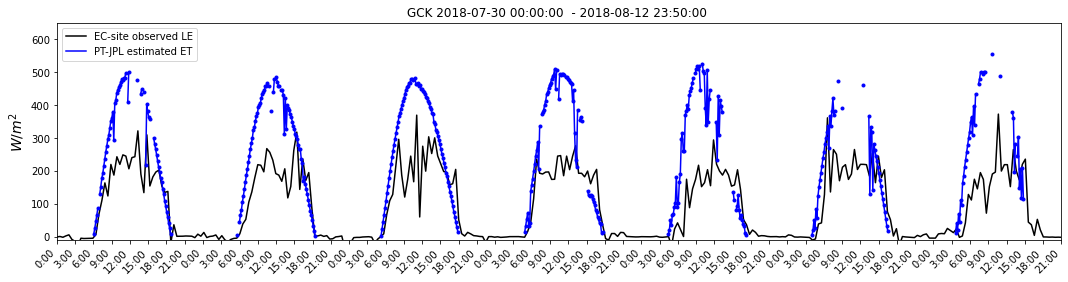

In [170]:
# good 30
week_idx = 30
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title(('GCK ' + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

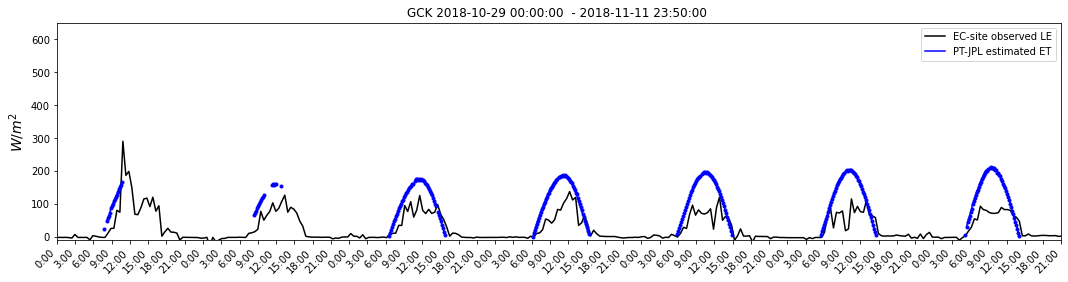

In [171]:
# good 30
week_idx = 43
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title(('GCK ' + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

## GDK

In [172]:
site_name = 'GDK'
site_output_csv = os.path.join(OUTPUT_FOLDER, site_name + '_PL-JPL_outputs.csv')
datMMS = pd.read_csv(site_output_csv)

site_timelist = numpy.array(datMMS.Time)
site_et_list = numpy.array(datMMS.evapotranspiration).astype(float)

site_obs_le_csv = os.path.join('/disk2/Data/FluxSite4ET/validation', site_name + '_2018_2019_LE.csv')
site_obs_timelist, site_obs_le = read_site_csv(site_obs_le_csv)

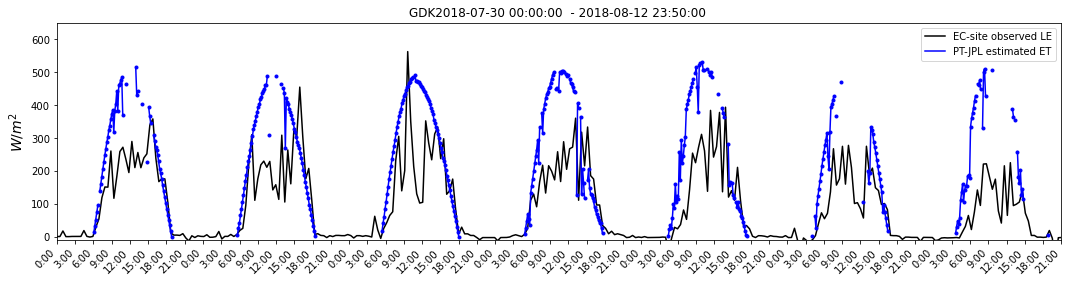

In [173]:
# good 30
week_idx = 30
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title((site_name + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

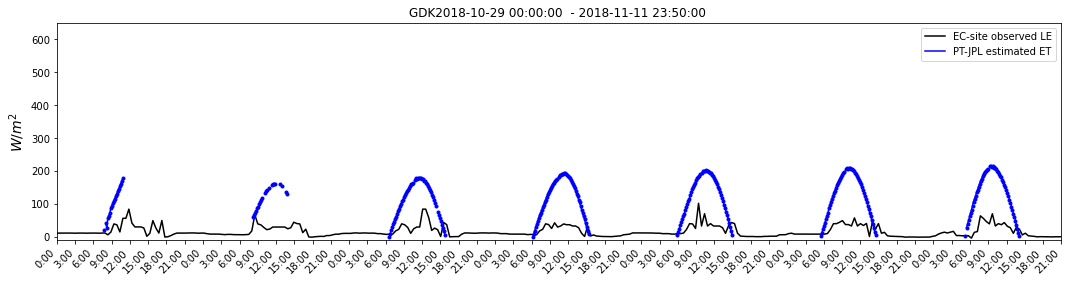

In [174]:
# good 30
week_idx = 43
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title((site_name + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

## TKY

In [175]:
site_name = 'TKY'
site_output_csv = os.path.join(OUTPUT_FOLDER, site_name + '_PL-JPL_outputs.csv')
datMMS = pd.read_csv(site_output_csv)

site_timelist = numpy.array(datMMS.Time)
site_et_list = numpy.array(datMMS.evapotranspiration).astype(float)

site_obs_le_csv = os.path.join('/disk2/Data/FluxSite4ET/validation', site_name + '_2018_2019_LE.csv')
site_obs_timelist, site_obs_le = read_site_csv(site_obs_le_csv)

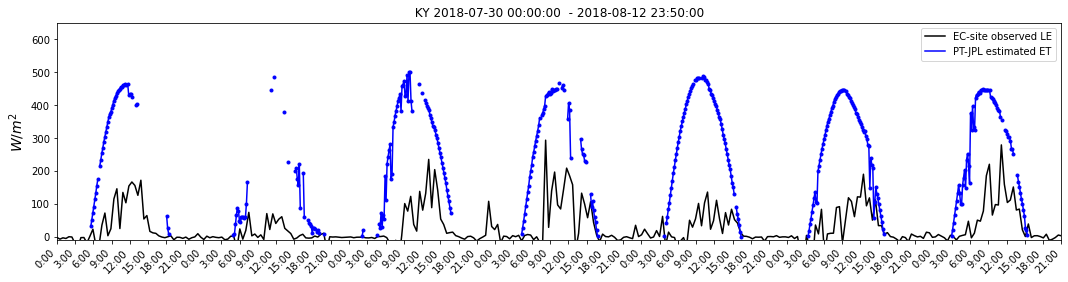

In [176]:
# good 30
week_idx = 30
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title((site_name + ' ' + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()

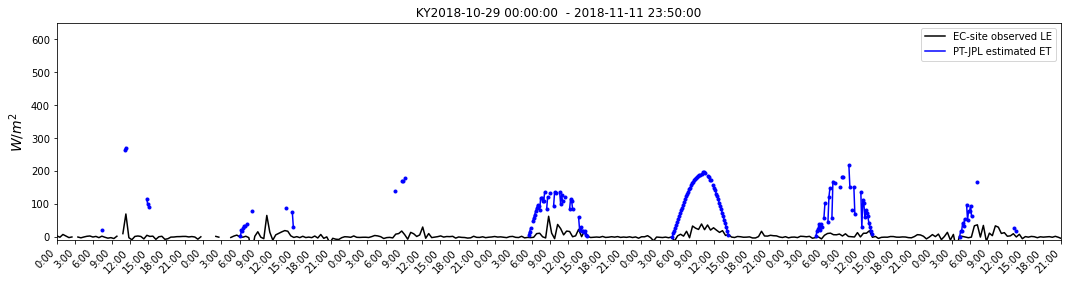

In [177]:
# good 30
week_idx = 43
week_et = site_et_list[7*24*6*week_idx:7*24*6*(week_idx+1)]

week_le_hh = site_obs_le[::3]
week_le = week_le_hh[7*24*2*week_idx:7*24*2*(week_idx+1)]

site_timelist_show = site_timelist[7*24*6*week_idx:7*24*6*(week_idx+1)]
formatted_dates = []
for date_string in site_timelist_show:
    dt_object = datetime.strptime(date_string, "%Y-%m-%dT%H:%M:%SZ")
    formatted_date = dt_object.strftime("%-H:%M")
    formatted_dates.append(formatted_date)

plt.figure(figsize=(18, 4))
plt.plot(numpy.linspace(0, len(week_et), len(week_le)), week_le, '-', color='black', label='EC-site observed LE')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '-', color='blue', label='PT-JPL estimated ET')
plt.plot(numpy.linspace(0, len(week_et), len(week_et)), week_et, '.', color='blue')
plt.xticks(numpy.linspace(0, len(week_et), int(len(week_et)/18)), formatted_dates[::18], rotation=45, ha='right')
plt.ylabel(r'$W/m^2$', fontsize=14)
plt.xlim(0,len(week_et))
plt.ylim((-10,650))
plt.title((site_name + site_timelist[7*24*6*week_idx] + ' - ' + site_timelist[7*24*6*(week_idx+2)-1]).replace('T',' ').replace('Z',' '))
plt.legend()